In [4]:
# 데이터 불러오기
import pandas as pd

# 파일 경로
train_path = r"C:\Users\eunse\OneDrive\바탕 화면\KUBIG 2025\DL Basic Study\프로젝트\train.csv"
test_path = r"C:\Users\eunse\OneDrive\바탕 화면\KUBIG 2025\DL Basic Study\프로젝트\test.csv"
sample_submission_path = r"C:\Users\eunse\OneDrive\바탕 화면\KUBIG 2025\DL Basic Study\프로젝트\sample_submission.csv"

# CSV 불러오기
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sample_submission = pd.read_csv(sample_submission_path)

# 데이터 확인
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample Submission shape:", sample_submission.shape)

# 처음 5행 미리보기
train.head()


Train shape: (3000, 18)
Test shape: (3000, 17)
Sample Submission shape: (3000, 2)


,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


In [5]:
# column type 확인
print("\n[Data Info]")
print(train.info())


[Data Info]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 


In [6]:
#결측지 
na_cnt = train.isna().sum()
na_ratio = (na_cnt / len(train)).round(4)
na_df = pd.DataFrame({"na_count": na_cnt, "na_ratio": na_ratio}).sort_values("na_count", ascending=False)
display(na_df)


,na_count,na_ratio
family_medical_history,1486,0.4953
medical_history,1289,0.4297
mean_working,1032,0.3440
edu_level,607,0.2023
gender,0,0.0000
ID,0,0.0000
age,0,0.0000
height,0,0.0000
weight,0,0.0000
cholesterol,0,0.0000


In [7]:
# 수치형 변수와 범주형 변수 분리
import numpy as np
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
# 타겟과 ID는 분석 분류에서 잠깐 제외
numeric_cols_wo_target = [c for c in numeric_cols if c not in ["stress_score", "ID"]]
categorical_cols = [c for c in train.columns if c not in numeric_cols and c not in ["ID"]]
print("\n[Column Groups]")
print("Numeric (w/o target):", numeric_cols_wo_target)
print("Categorical:", categorical_cols)


[Column Groups]
Numeric (w/o target): ['age', 'height', 'weight', 'cholesterol', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'glucose', 'bone_density', 'mean_working']
Categorical: ['gender', 'activity', 'smoke_status', 'medical_history', 'family_medical_history', 'sleep_pattern', 'edu_level']


In [8]:
# 수치형 통계와, 범주형의 고유값 개수
if numeric_cols_wo_target:
    display(train[numeric_cols_wo_target].describe().T)
if categorical_cols:
    nunique_df = train[categorical_cols].nunique().sort_values(ascending=False).to_frame("nunique")
    display(nunique_df)


,count,mean,std,min,25%,50%,75%,max
age,3000.0,53.068000,20.672070,17.00,35.0000,53.000,72.0000,89.00
height,3000.0,168.585687,9.351876,141.13,161.8000,168.115,175.3525,195.28
weight,3000.0,72.486680,13.167222,36.32,63.0350,71.240,81.8325,120.88
cholesterol,3000.0,233.910523,24.333434,148.81,216.9275,234.255,250.3775,313.35
systolic_blood_pressure,3000.0,146.144333,15.845310,97.00,135.0000,146.000,158.0000,191.00
diastolic_blood_pressure,3000.0,95.504000,9.895283,60.00,89.0000,95.000,102.0000,124.00
glucose,3000.0,126.467720,18.536844,70.05,113.9125,126.555,139.1800,185.74
bone_density,3000.0,0.933367,0.444783,-0.22,0.5600,0.940,1.3000,2.00
mean_working,1968.0,8.716972,1.628944,4.00,8.0000,9.000,10.0000,16.00


,nunique
activity,3
smoke_status,3
medical_history,3
sleep_pattern,3
family_medical_history,3
edu_level,3
gender,2


[Target Summary]
   count: 3000.0000
    mean: 0.4821
  median: 0.4800
     std: 0.2883
     min: 0.0000
     max: 1.0000
    skew: 0.0581
kurtosis: -1.1863


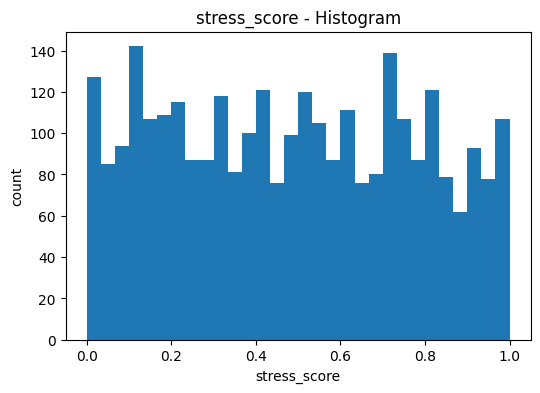

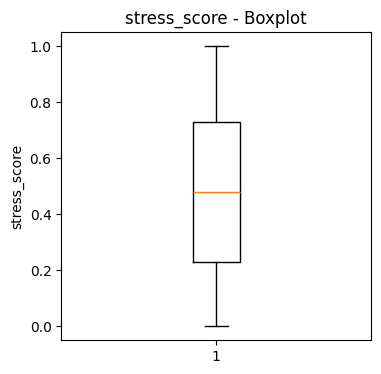


[IQR Outliers] count = 0 / 3000
Lower bound = -0.5200, Upper bound = 1.4800


In [9]:
# target 변수 (stress_score 분석)
import matplotlib.pyplot as plt

target = "stress_score"
assert target in train.columns, "타겟 컬럼(stress_score)이 train에 없습니다."

y = train[target].dropna()

# 1. 기본 통계
stats = {
    "count": y.shape[0],
    "mean": y.mean(),
    "median": y.median(),
    "std": y.std(ddof=1),
    "min": y.min(),
    "max": y.max(),
    "skew": y.skew(),       # 왜도
    "kurtosis": y.kurtosis()# 첨도
}
print("[Target Summary]")
for k, v in stats.items():
    print(f"{k:>8}: {v:.4f}")

#  2. 분포(히스토그램) 
plt.figure(figsize=(6,4))
plt.hist(y, bins=30)
plt.title("stress_score - Histogram")
plt.xlabel("stress_score")
plt.ylabel("count")
plt.show()

#  3. 박스플롯 (이상치 감)
plt.figure(figsize=(4,4))
plt.boxplot(y, vert=True)
plt.title("stress_score - Boxplot")
plt.ylabel("stress_score")
plt.show()

#  4. IQR 기반 이상치 개수 확인 
Q1, Q3 = y.quantile(0.25), y.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outlier_mask = (y < lower) | (y > upper)
print(f"\n[IQR Outliers] count = {outlier_mask.sum()} / {len(y)}")
print(f"Lower bound = {lower:.4f}, Upper bound = {upper:.4f}")



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


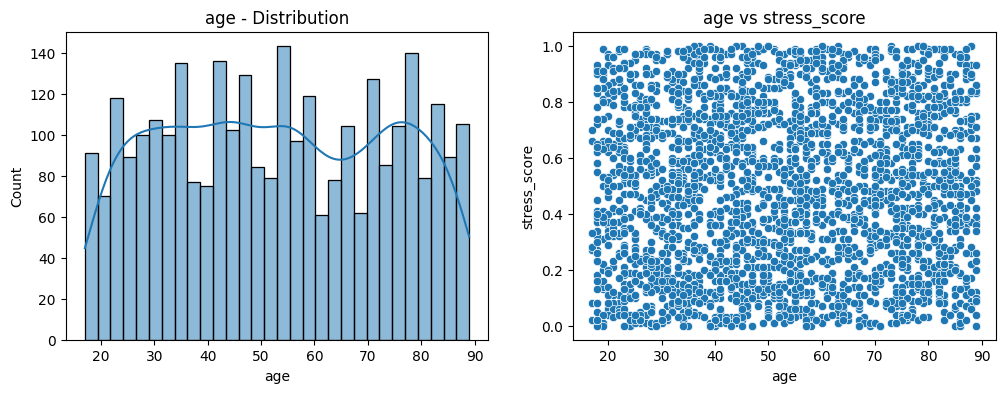

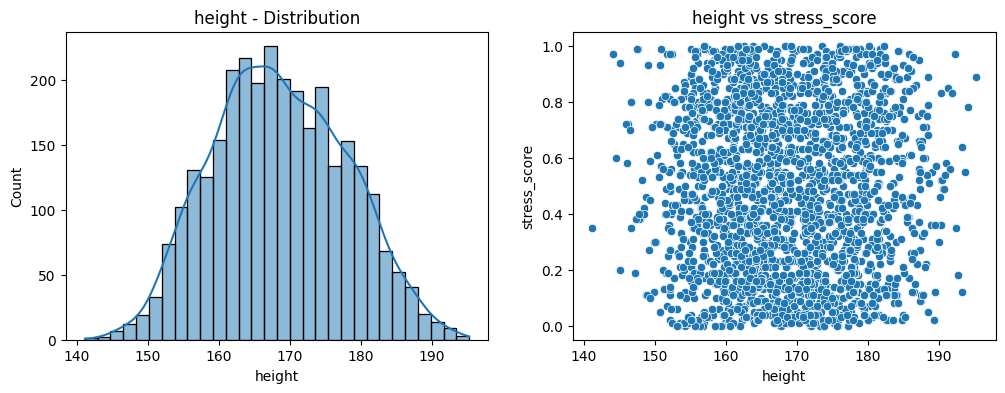

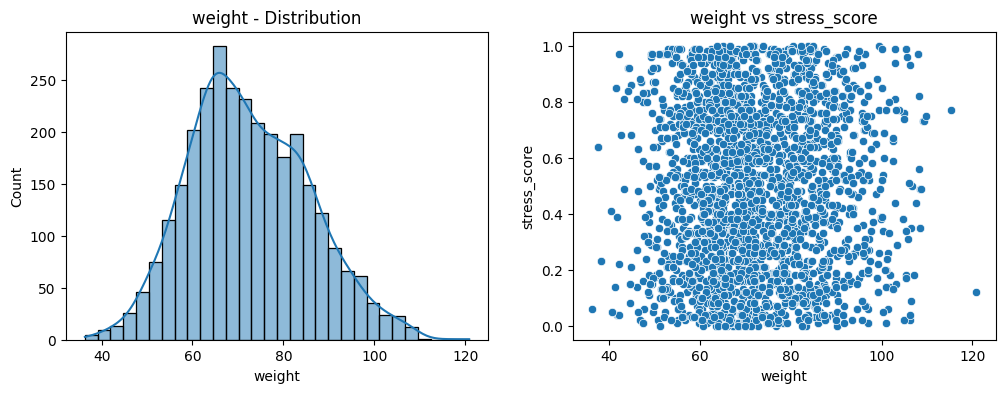

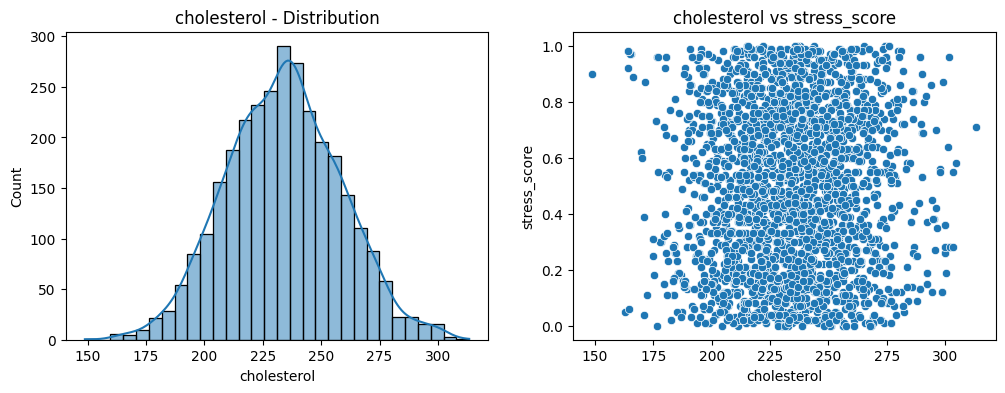

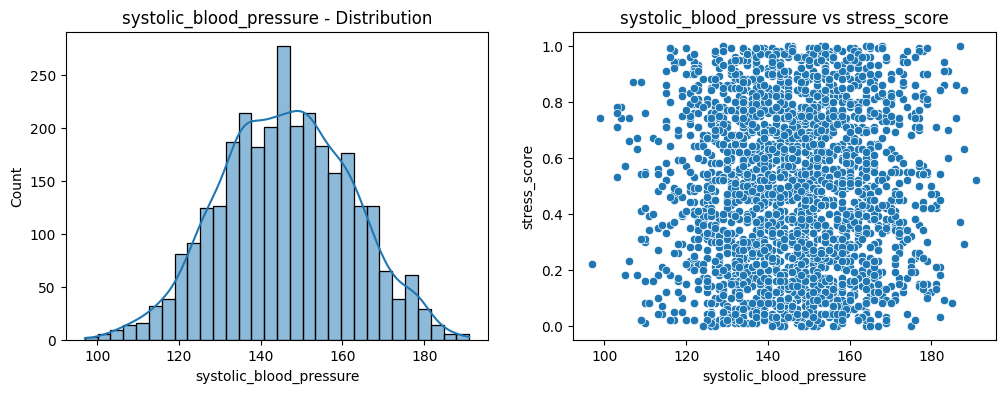

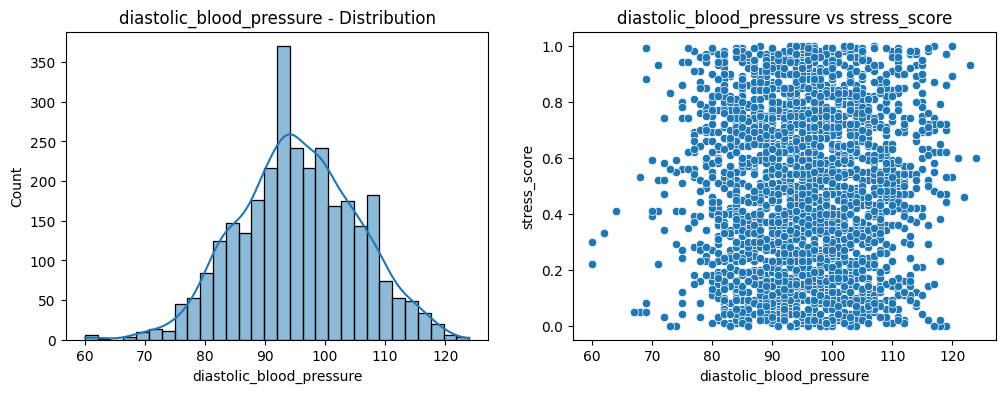

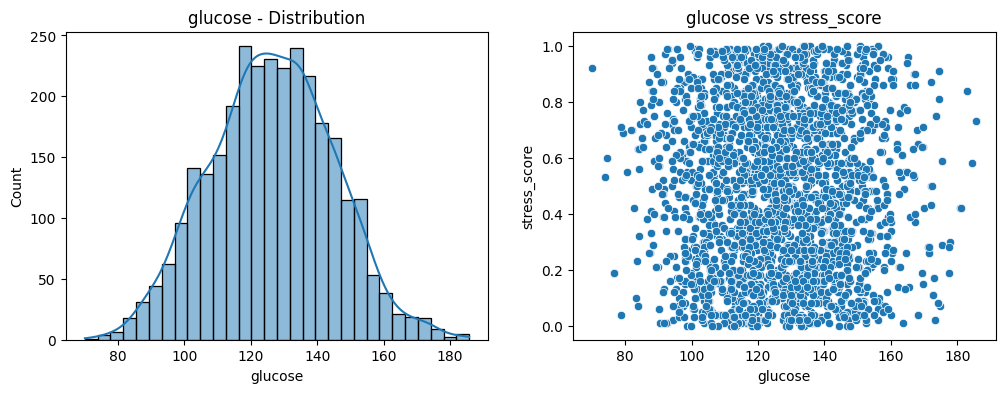

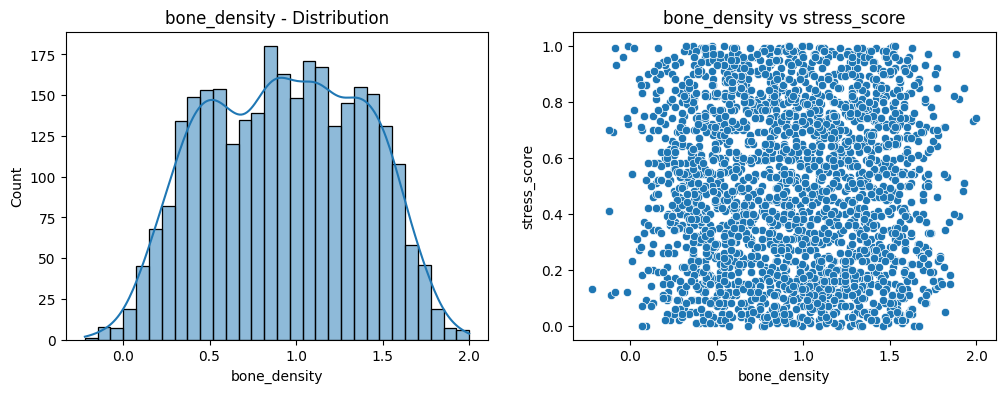

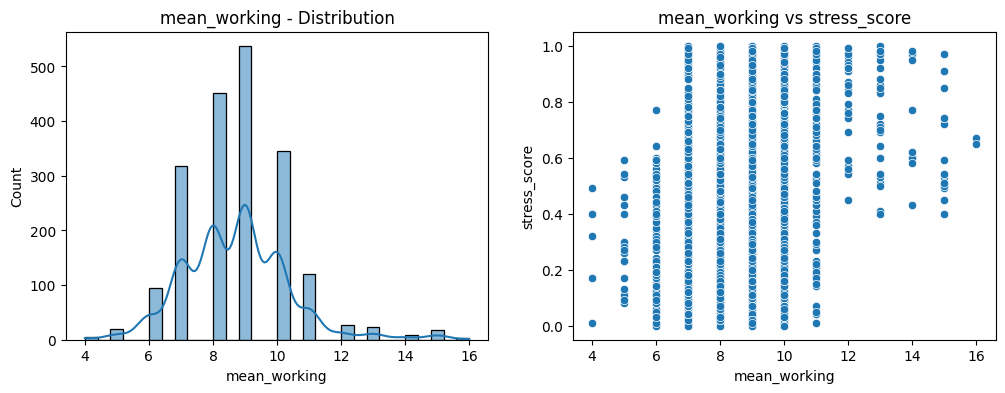


[Correlation with Target]
mean_working                0.183433
diastolic_blood_pressure    0.025351
cholesterol                 0.021288
age                         0.018656
systolic_blood_pressure     0.015635
weight                      0.011328
height                     -0.005664
glucose                    -0.006083
bone_density               -0.022556
Name: stress_score, dtype: float64


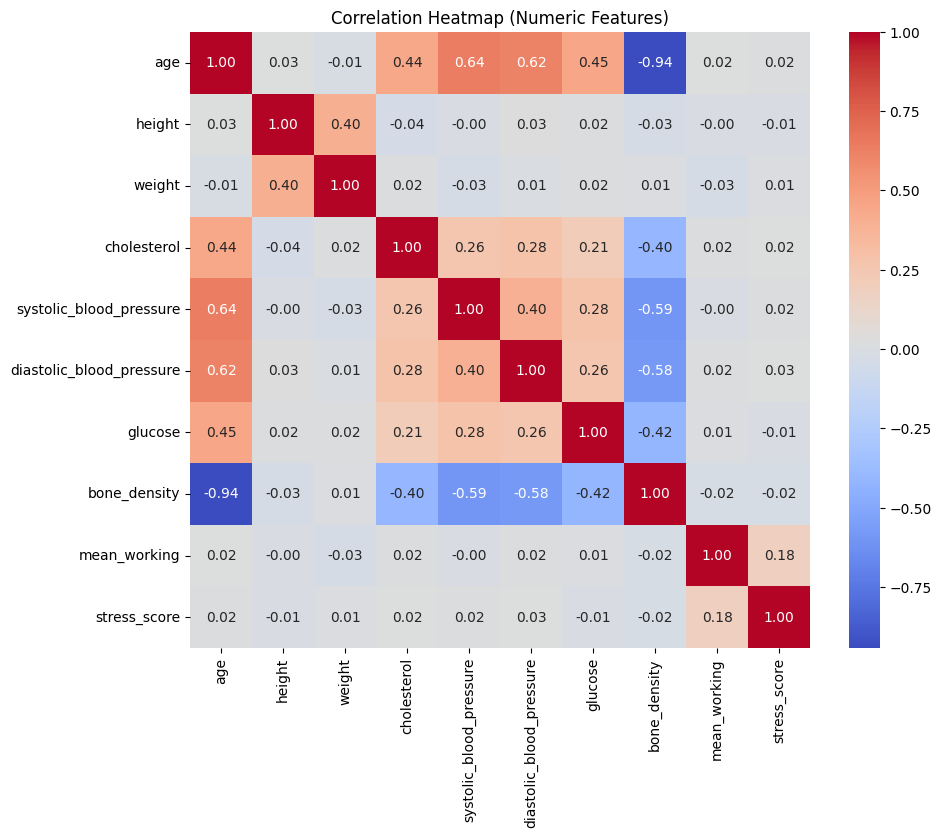

In [10]:
# 수치형 변수
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# === 각 수치형 변수 분포 확인 ===
for col in numeric_cols_wo_target:
    plt.figure(figsize=(12,4))

    # 1. 히스토그램
    plt.subplot(1,2,1)
    sns.histplot(train[col], kde=True, bins=30)
    plt.title(f"{col} - Distribution")

    # 2. 타겟과의 산점도
    plt.subplot(1,2,2)
    sns.scatterplot(x=train[col], y=train[target])
    plt.title(f"{col} vs {target}")

    plt.show()

# === 수치형 변수와 타겟의 상관계수 ===
corr_with_target = train[numeric_cols_wo_target + [target]].corr()[target].drop(target)
corr_with_target = corr_with_target.sort_values(ascending=False)
print("\n[Correlation with Target]")
print(corr_with_target)

# 히트맵으로 전체 상관관계 시각화
plt.figure(figsize=(10,8))
sns.heatmap(train[numeric_cols_wo_target + [target]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()
#나이, 혈압, 골밀도는 서로 강하게 연결된 패턴 존재 → 다중공선성 주의 필요

C:\Users\eunse\AppData\Local\Temp\ipykernel_16924\122103779.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target, data=train, estimator=np.mean, ci=None)


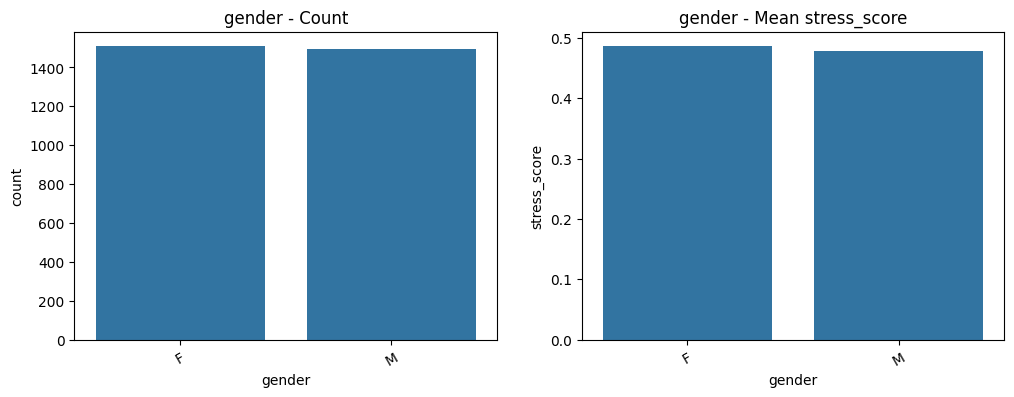

C:\Users\eunse\AppData\Local\Temp\ipykernel_16924\122103779.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target, data=train, estimator=np.mean, ci=None)


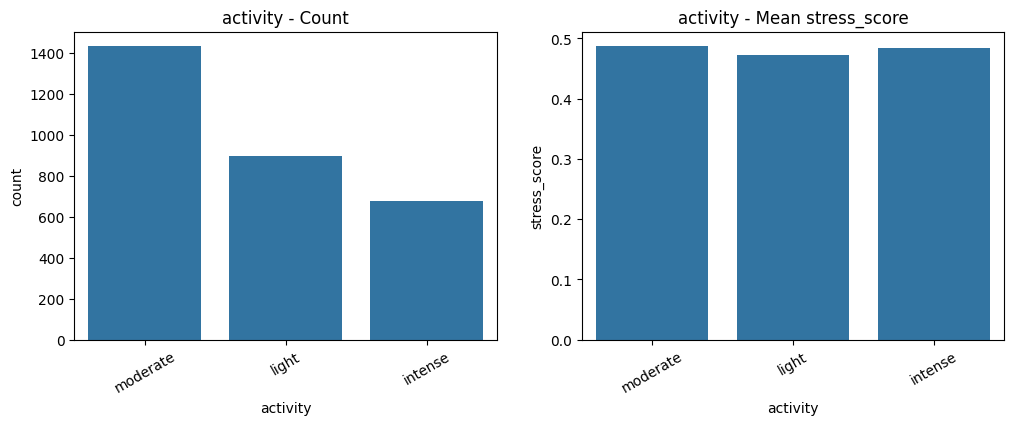

C:\Users\eunse\AppData\Local\Temp\ipykernel_16924\122103779.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target, data=train, estimator=np.mean, ci=None)


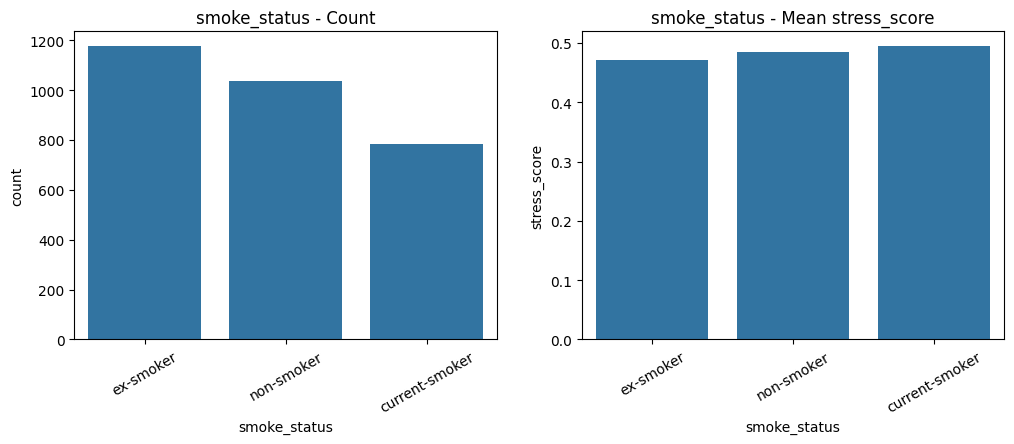

C:\Users\eunse\AppData\Local\Temp\ipykernel_16924\122103779.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target, data=train, estimator=np.mean, ci=None)


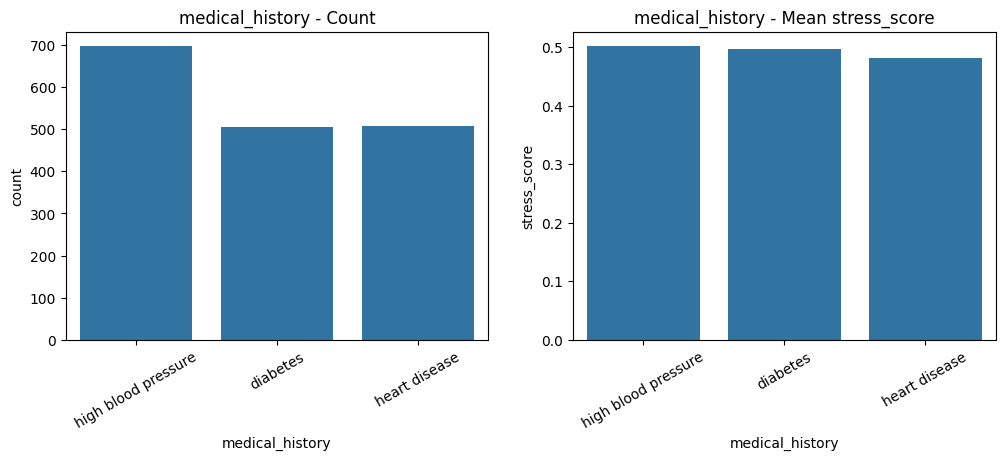

C:\Users\eunse\AppData\Local\Temp\ipykernel_16924\122103779.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target, data=train, estimator=np.mean, ci=None)


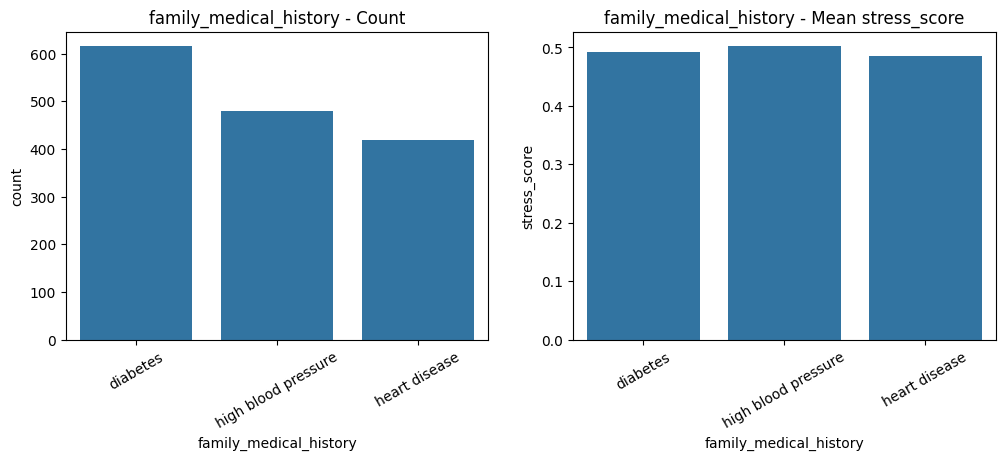

C:\Users\eunse\AppData\Local\Temp\ipykernel_16924\122103779.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target, data=train, estimator=np.mean, ci=None)


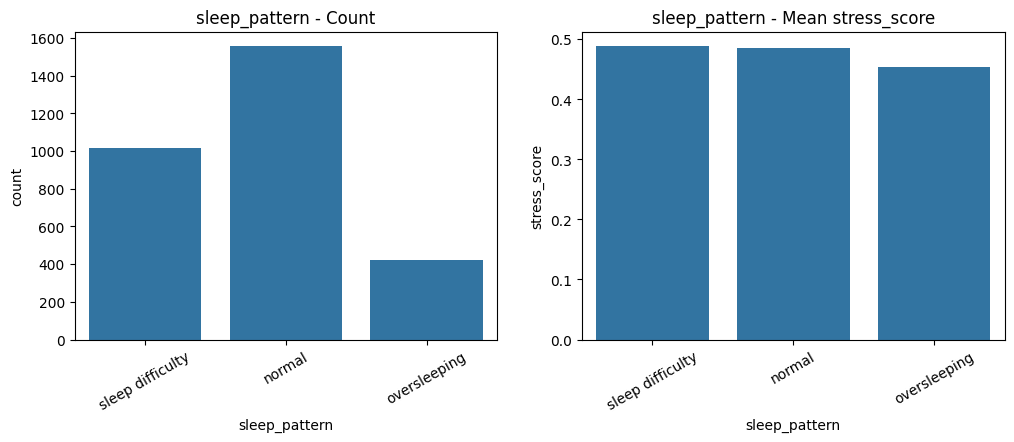

C:\Users\eunse\AppData\Local\Temp\ipykernel_16924\122103779.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target, data=train, estimator=np.mean, ci=None)


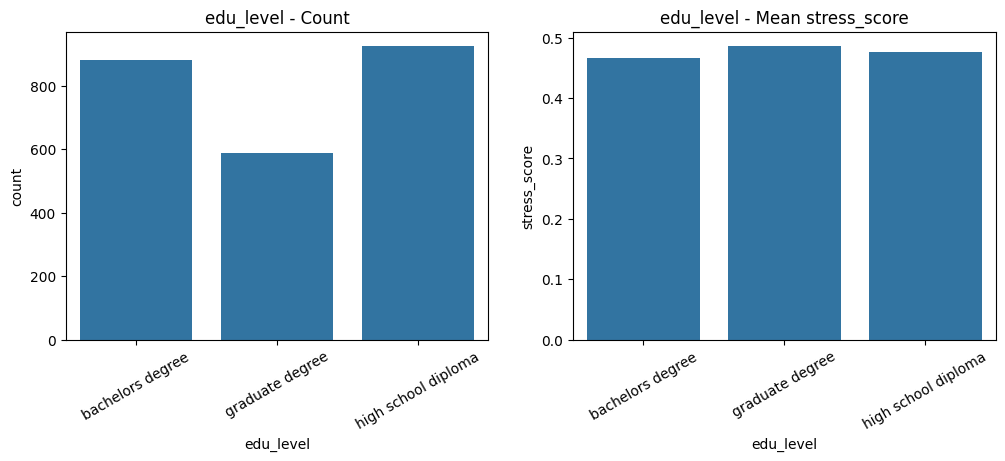

,gender,mean,std,count,feature,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level
0,F,0.486034,0.288745,1508,gender,NaN,NaN,NaN,NaN,NaN,NaN
1,M,0.478184,0.287796,1492,gender,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.484800,0.294266,675,activity,intense,NaN,NaN,NaN,NaN,NaN
3,NaN,0.472685,0.286031,894,activity,light,NaN,NaN,NaN,NaN,NaN
4,NaN,0.486771,0.286827,1431,activity,moderate,NaN,NaN,NaN,NaN,NaN
5,NaN,0.494770,0.295090,784,smoke_status,NaN,current-smoker,NaN,NaN,NaN,NaN
6,NaN,0.470663,0.285068,1177,smoke_status,NaN,ex-smoker,NaN,NaN,NaN,NaN
7,NaN,0.485582,0.286404,1039,smoke_status,NaN,non-smoker,NaN,NaN,NaN,NaN
8,NaN,0.497787,0.281442,506,medical_history,NaN,NaN,diabetes,NaN,NaN,NaN
9,NaN,0.482146,0.291021,508,medical_history,NaN,NaN,heart disease,NaN,NaN,NaN


In [11]:
# === 범주별 빈도 & 타겟 평균 비교 ===
for col in categorical_cols:
    plt.figure(figsize=(12,4))

    # 1. 범주별 빈도
    plt.subplot(1,2,1)
    sns.countplot(x=col, data=train)
    plt.title(f"{col} - Count")
    plt.xticks(rotation=30)

    # 2. 범주별 타겟 평균
    plt.subplot(1,2,2)
    sns.barplot(x=col, y=target, data=train, estimator=np.mean, ci=None)
    plt.title(f"{col} - Mean {target}")
    plt.xticks(rotation=30)

    plt.show()

# === 범주형 변수별 타겟 평균 & 표준편차 요약 ===
cat_summary = []
for col in categorical_cols:
    tmp = train.groupby(col)[target].agg(["mean", "std", "count"]).reset_index()
    tmp["feature"] = col
    cat_summary.append(tmp)
cat_summary_df = pd.concat(cat_summary, ignore_index=True)
display(cat_summary_df)

# 범주형 분석 단독으로는 큰 의미 가지지 않음


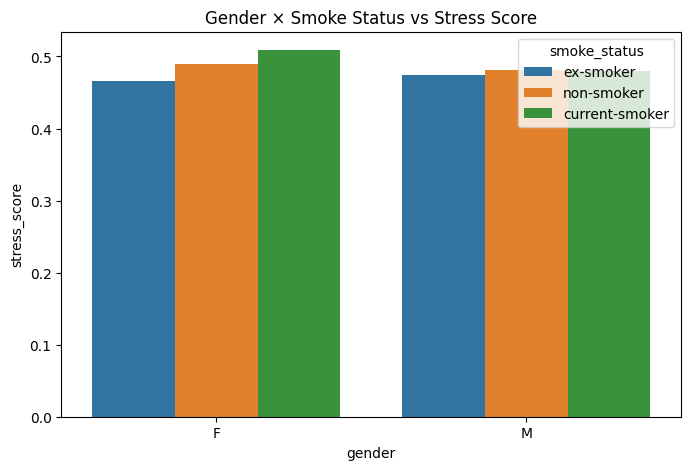

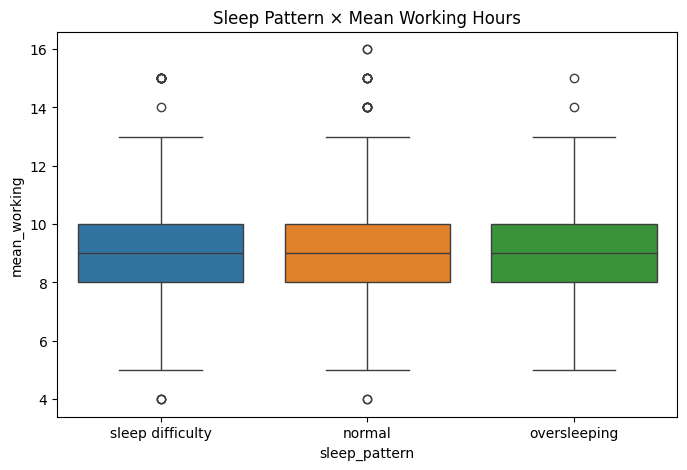

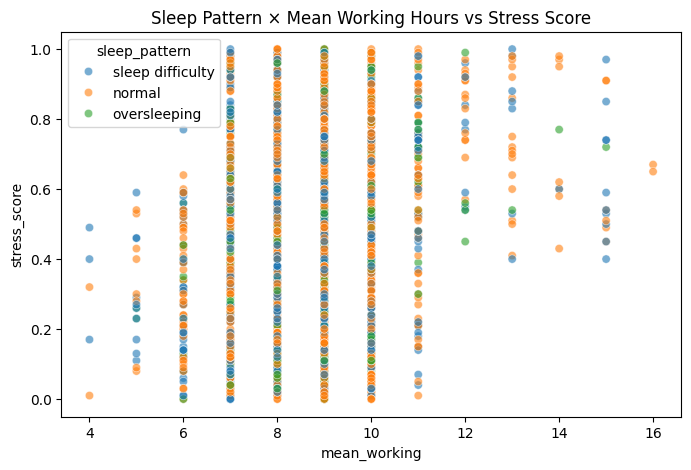

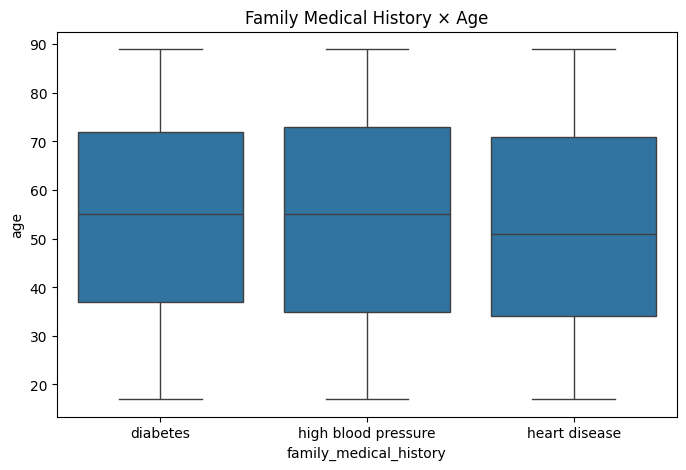

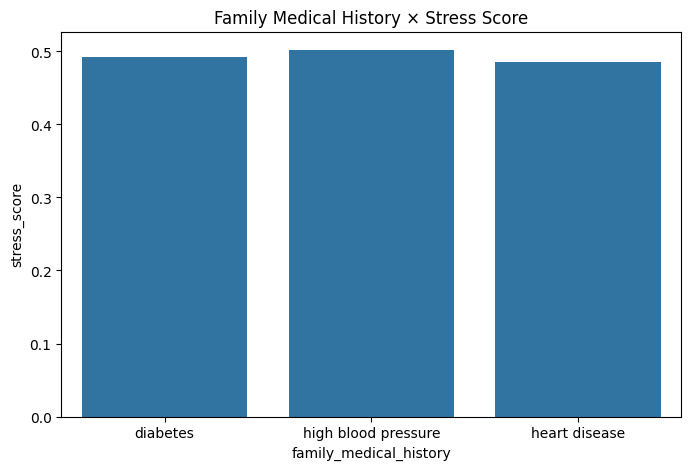

In [12]:
# 범주형 각각 변수로는 큰 의미가 없으니 교호작용 시각화 시도
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 성별 × 흡연 상태
plt.figure(figsize=(8,5))
sns.barplot(x="gender", y=target, hue="smoke_status", data=train, estimator=np.mean, errorbar=None)
plt.title("Gender × Smoke Status vs Stress Score")
plt.show()

# 2. 수면 패턴 × 주당 근로시간
plt.figure(figsize=(8,5))
sns.boxplot(x="sleep_pattern", y="mean_working", hue="sleep_pattern", data=train)
plt.title("Sleep Pattern × Mean Working Hours")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x="mean_working", y=target, hue="sleep_pattern", data=train, alpha=0.6)
plt.title("Sleep Pattern × Mean Working Hours vs Stress Score")
plt.show()

# 3. 가족력 × 나이
plt.figure(figsize=(8,5))
sns.boxplot(x="family_medical_history", y="age", data=train)
plt.title("Family Medical History × Age")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="family_medical_history", y=target, data=train, estimator=np.mean, errorbar=None)
plt.title("Family Medical History × Stress Score")
plt.show()



[타겟과 상관계수 랭킹]
mean_working                                  0.183433
medical_history_high blood pressure           0.037315
family_medical_history_high blood pressure    0.029869
diastolic_blood_pressure                      0.025351
cholesterol                                   0.021288
age                                           0.018656
systolic_blood_pressure                       0.015635
activity_moderate                             0.015380
sleep_pattern_sleep difficulty                0.015140
weight                                        0.011328
smoke_status_non-smoker                       0.008719
edu_level_graduate degree                     0.005868
family_medical_history_heart disease          0.003695
medical_history_heart disease                 0.000025
height                                       -0.005664
glucose                                      -0.006083
edu_level_high school diploma                -0.013298
gender_M                                     -0.01

c:\Users\eunse\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\eunse\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\eunse\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\eunse\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\eunse\AppData\Local\Programs\Python\Python312\Lib\site-packages\

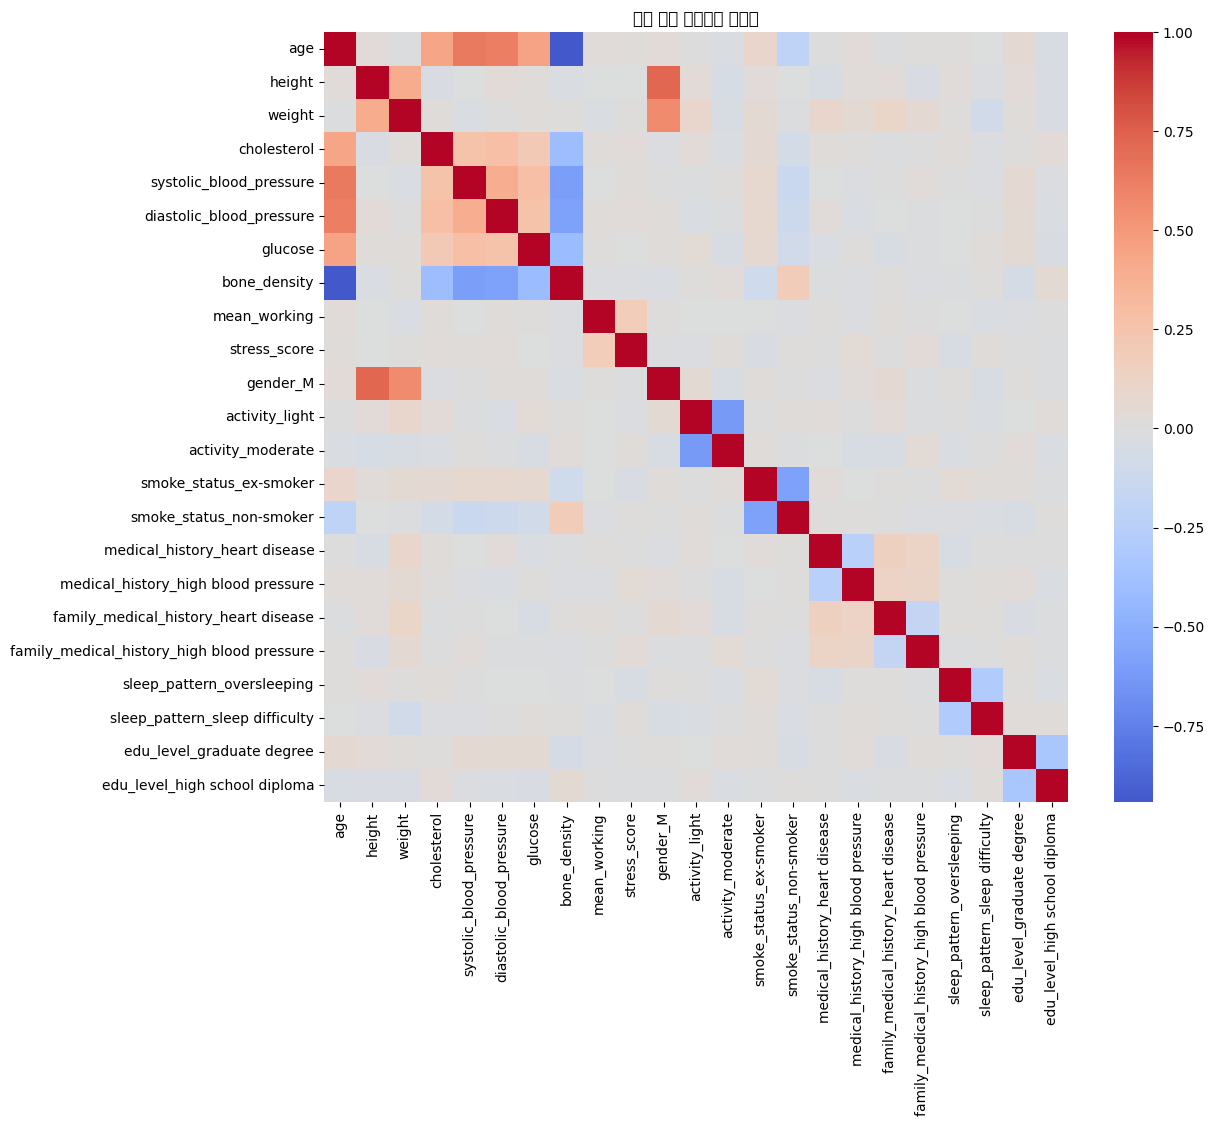

C:\Users\eunse\AppData\Local\Temp\ipykernel_16924\226021517.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values[:top_n], y=corr_with_target.index[:top_n], palette="coolwarm")
c:\Users\eunse\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\eunse\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\eunse\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu

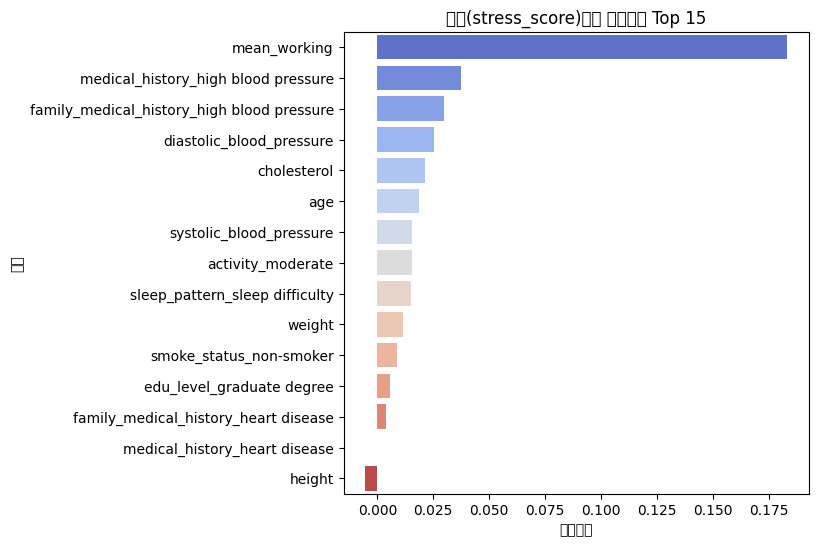

In [13]:
# 전체 heatmap: 수치형 & 범주형 변수포함

# 타겟 변수
target = "stress_score"

# 1. 범주형 변수 원-핫 인코딩
df_encoded = pd.get_dummies(train.drop(columns=["ID"]), drop_first=True)

# 2. 상관계수 행렬 계산
corr_matrix = df_encoded.corr()

# 3. 타겟과의 상관관계만 추출
corr_with_target = corr_matrix[target].drop(target).sort_values(ascending=False)

print("\n[타겟과 상관계수 랭킹]")
print(corr_with_target)

# 4. 전체 상관관계 히트맵
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("전체 피처 상관관계 히트맵")
plt.show()

# 5. 타겟과 상관관계 시각화 (상위 15개만)
top_n = 15
plt.figure(figsize=(6, top_n*0.4))
sns.barplot(x=corr_with_target.values[:top_n], y=corr_with_target.index[:top_n], palette="coolwarm")
plt.title(f"타겟({target})과의 상관관계 Top {top_n}")
plt.xlabel("상관계수")
plt.ylabel("변수")
plt.show()


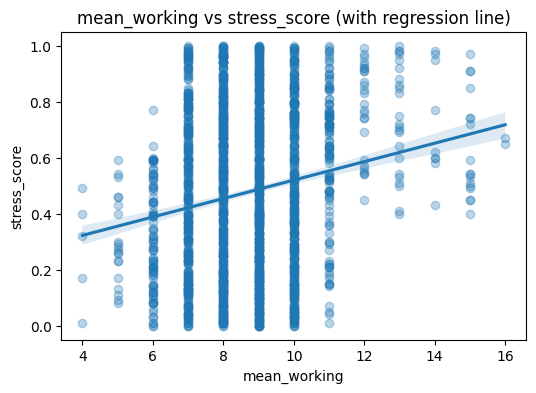

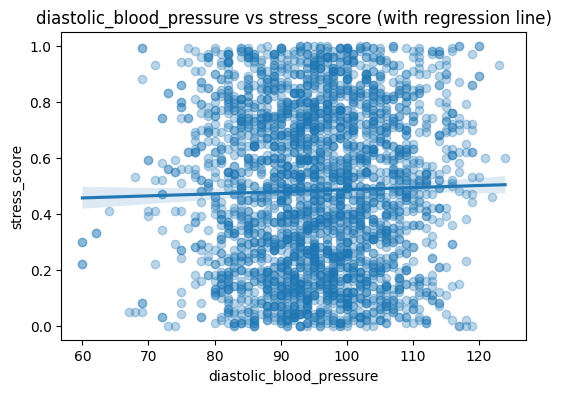

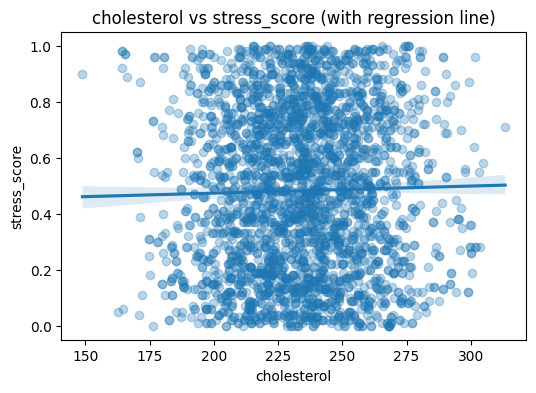

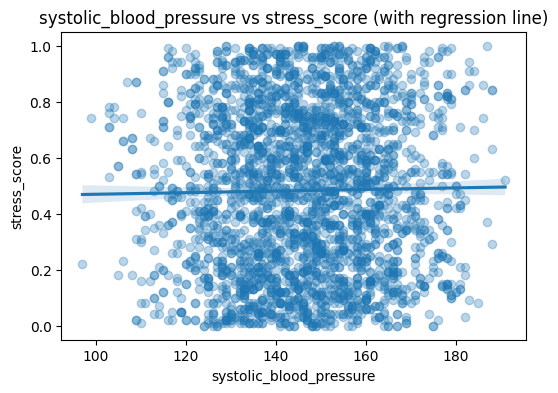

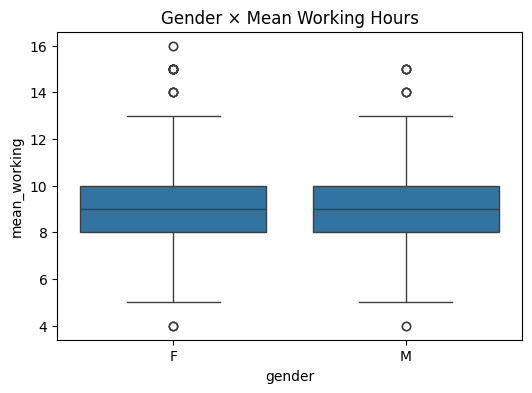

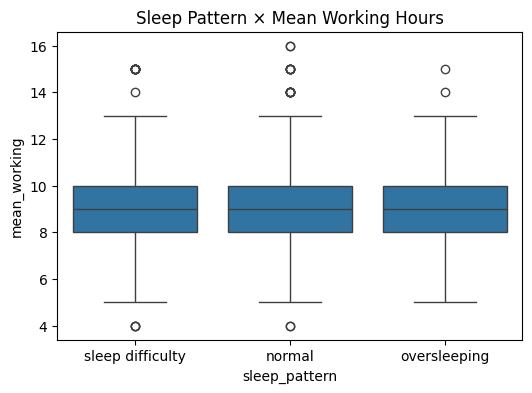

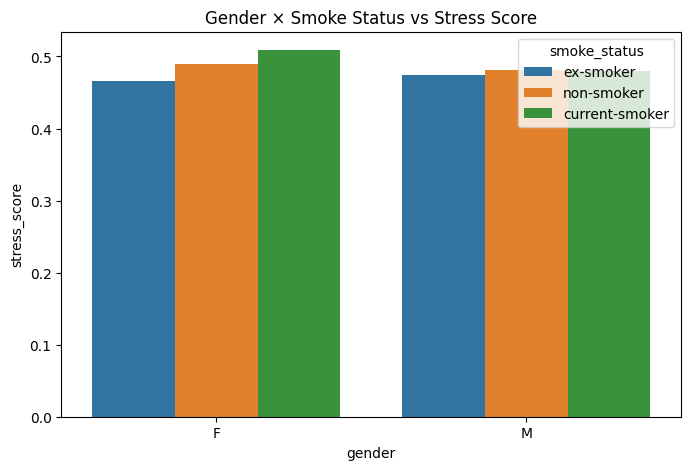

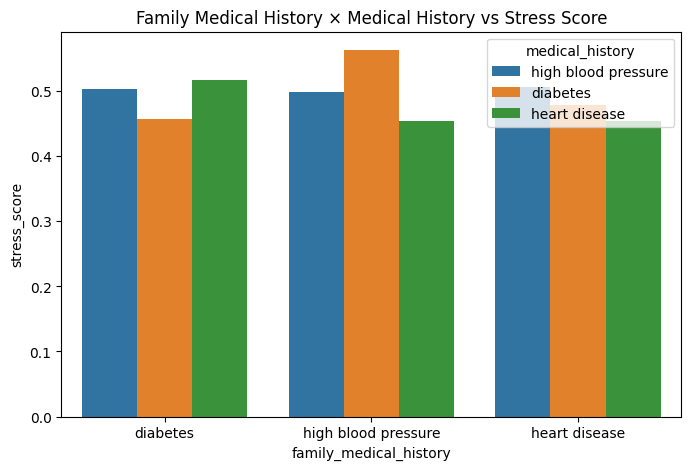

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

target = "stress_score"

# === 1. 수치형 변수 vs 타겟 (회귀선 포함) ===
numeric_focus = ["mean_working", "diastolic_blood_pressure", "cholesterol", "systolic_blood_pressure"]

for col in numeric_focus:
    plt.figure(figsize=(6,4))
    sns.regplot(x=col, y=target, data=train, scatter_kws={'alpha':0.3})
    plt.title(f"{col} vs {target} (with regression line)")
    plt.show()

# === 2. 범주형 × 수치형 vs 타겟 ===
plt.figure(figsize=(6,4))
sns.boxplot(x="gender", y="mean_working", data=train)
plt.title("Gender × Mean Working Hours")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="sleep_pattern", y="mean_working", data=train)
plt.title("Sleep Pattern × Mean Working Hours")
plt.show()

# === 3. 범주형 × 범주형 vs 타겟 ===
plt.figure(figsize=(8,5))
sns.barplot(x="gender", y=target, hue="smoke_status", data=train, estimator=np.mean, errorbar=None)
plt.title("Gender × Smoke Status vs Stress Score")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="family_medical_history", y=target, hue="medical_history", data=train, estimator=np.mean, errorbar=None)
plt.title("Family Medical History × Medical History vs Stress Score")
plt.show()


In [15]:
# 다중공산성 의심되는 4개 수치형 변수들간 PCA(차원축소) 
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# 표준화까지 된 데이터 (X_pca_scaled)를 전 범위 컴포넌트로 다시 PCA
pca_full = PCA(n_components=len(pca_cols), random_state=42)
pca_full.fit(X_pca_scaled)

var_ratio = pca_full.explained_variance_ratio_
cum_var = np.cumsum(var_ratio)

# 1) Scree plot (고유값 비율)
plt.figure(figsize=(6,4))
plt.plot(range(1, len(var_ratio)+1), var_ratio, marker='o')
plt.title("Scree Plot (Explained Variance Ratio by PC)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(var_ratio)+1))
plt.show()

# 2) 누적 설명 분산
plt.figure(figsize=(6,4))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.xticks(range(1, len(cum_var)+1))
plt.ylim(0,1.05)
plt.grid(True, alpha=0.3)
plt.show()

print("각 PC 설명분산비율:", np.round(var_ratio, 4))
print("누적 설명분산비율 :", np.round(cum_var, 4))





[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


NameError: name 'pca_cols' is not defined

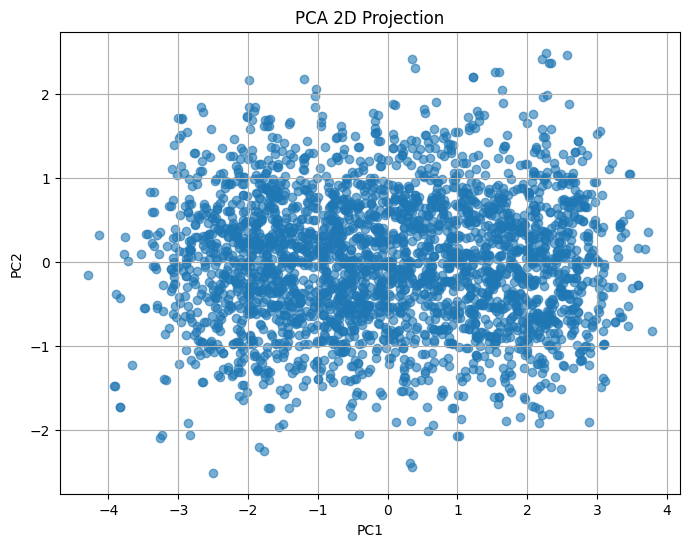

In [ ]:
# 2개의 변수로 차원축소
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D Projection')
plt.grid(True)
plt.show()


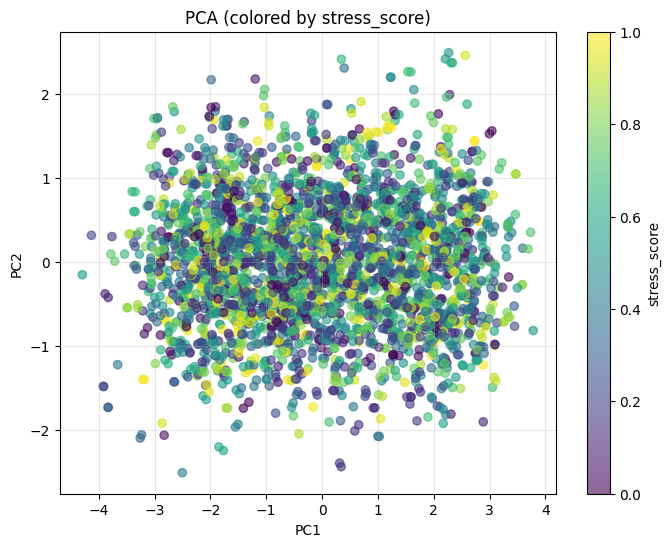

In [ ]:
# stess score에 따른 색상구분 PCA 산점도
# PCA 점수 (이미 fit된 pca와 X_pca_scaled 사용)
scores = pca.transform(X_pca_scaled)  # shape (n, 2) 사용 중이면 그대로

y = train["stress_score"].values

plt.figure(figsize=(8,6))
sc = plt.scatter(scores[:,0], scores[:,1], c=y, alpha=0.6)
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.title("PCA (colored by stress_score)")
cb = plt.colorbar(sc)
cb.set_label("stress_score")
plt.grid(True, alpha=0.3)
plt.show()

In [18]:
# 딥러닝 진행 전 전체 변수 (수치형 + 범주형) 대상 트리 모델 기반 중요도 분석

In [19]:
# 1) column 세트 정의 & 존재 여부 체크
TARGET = "stress_score"
ID_COL = "ID"

numeric_cols = [
    "age","height","weight","cholesterol",
    "systolic_blood_pressure","diastolic_blood_pressure",
    "glucose","bone_density","mean_working"
]
categorical_cols = [
    "gender","activity","smoke_status","medical_history",
    "family_medical_history","sleep_pattern","edu_level"
]

# 누락된 컬럼이 없는지 점검
missing = [c for c in numeric_cols+categorical_cols+[TARGET, ID_COL] if c not in train.columns]
print("Missing columns:", missing)  # 빈 리스트가 정상


Missing columns: []


In [20]:
# 2) Train & Validation 분리
from sklearn.model_selection import train_test_split

X = train.drop(columns=[TARGET, ID_COL])
y = train[TARGET].values

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_tr.shape, X_val.shape


((2400, 16), (600, 16))

In [21]:
#3)전처리 파이프라인 생성 (수치: 중앙값 / 범주: 최빈값+원핫)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

pre = ColumnTransformer(
    transformers=[
        ("num", num_pipe, numeric_cols),
        ("cat", cat_pipe, categorical_cols),
    ],
    remainder="drop"
)


In [22]:
#4) 모델 파이프라인(랜덤포레스트) 학습 및 기본 점수
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=600, max_depth=None,
    random_state=42, n_jobs=-1
)

from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("pre", pre),
    ("model", rf)
])

pipe.fit(X_tr, y_tr)
print("Train R^2:", pipe.score(X_tr, y_tr))
print("Val   R^2:", pipe.score(X_val, y_val))



Train R^2: 0.901850074422483
Val   R^2: 0.30928321701571326



[Top 20 - Model-based Importances]


,feature,importance
3,cholesterol,0.121039
2,weight,0.112937
1,height,0.112894
6,glucose,0.107716
4,systolic_blood_pressure,0.090583
7,bone_density,0.086717
5,diastolic_blood_pressure,0.083730
0,age,0.066766
8,mean_working,0.051994
15,smoke_status_ex-smoker,0.010372


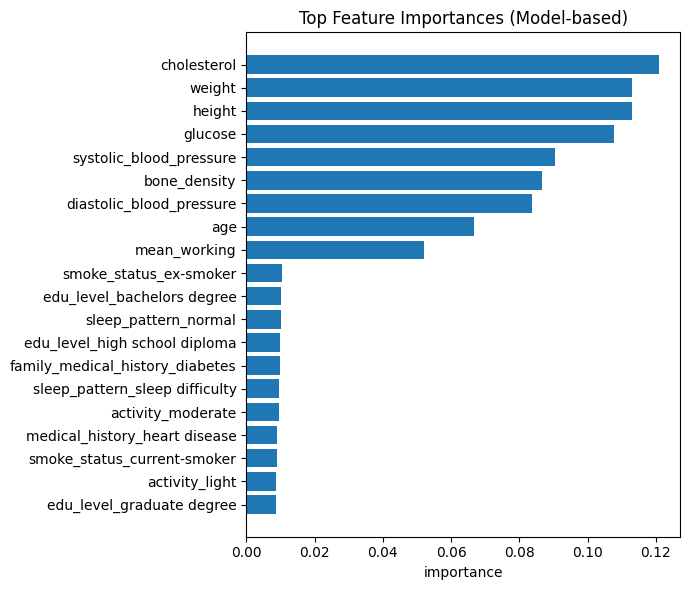

In [23]:
#5) “모델 내장 중요도” 계산 (전처리 후 피처 이름과 매핑)
# 전처리 후 피처 이름 만들기
ohe = pipe.named_steps["pre"].named_transformers_["cat"].named_steps["ohe"]
ohe_names = ohe.get_feature_names_out(categorical_cols).tolist()
feature_names_trans = numeric_cols + ohe_names

# 중요도 추출 (모델은 전처리 이후 피처 기준으로 학습함)
imp = pipe.named_steps["model"].feature_importances_
assert len(feature_names_trans) == len(imp), (len(feature_names_trans), len(imp))

imp_df = pd.DataFrame({"feature": feature_names_trans, "importance": imp}) \
          .sort_values("importance", ascending=False)

print("\n[Top 20 - Model-based Importances]")
display(imp_df.head(20))

plt.figure(figsize=(7,6))
topN = 20
plt.barh(imp_df["feature"].head(topN)[::-1], imp_df["importance"].head(topN)[::-1])
plt.title("Top Feature Importances (Model-based)")
plt.xlabel("importance")
plt.tight_layout(); plt.show()



[Top 20 - Permutation Importances on Validation]


,feature,importance_mean,importance_std
1,height,0.136115,0.013784
3,cholesterol,0.119688,0.008028
8,mean_working,0.097436,0.020110
6,glucose,0.081843,0.009591
2,weight,0.077847,0.008394
4,systolic_blood_pressure,0.071036,0.006301
5,diastolic_blood_pressure,0.069022,0.006118
7,bone_density,0.062740,0.005519
0,age,0.037883,0.003688
23,sleep_pattern_normal,0.010330,0.002511


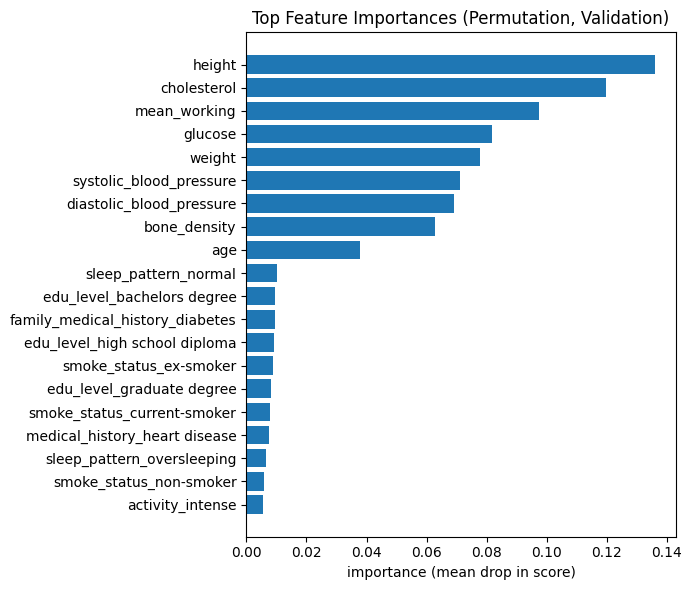

In [26]:
# 6) Permutation importance
from sklearn.inspection import permutation_importance

pre   = pipe.named_steps["pre"]
model = pipe.named_steps["model"]

# 전처리 적용
X_val_trans = pre.transform(X_val)

# permutation (전처리 '후' 행렬 + 모델)
result = permutation_importance(
    model, X_val_trans, y_val,
    n_repeats=10, random_state=42, n_jobs=-1
)

assert len(feature_names_trans) == result.importances_mean.shape[0]

perm_imp = pd.DataFrame({
    "feature": feature_names_trans,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values("importance_mean", ascending=False)

print("\n[Top 20 - Permutation Importances on Validation]")
display(perm_imp.head(20))

plt.figure(figsize=(7,6))
plt.barh(perm_imp["feature"].head(20)[::-1], perm_imp["importance_mean"].head(20)[::-1])
plt.title("Top Feature Importances (Permutation, Validation)")
plt.xlabel("importance (mean drop in score)")
plt.tight_layout(); plt.show()



[Grouped Importance (Permutation)]


,feature_group,importance_mean
1,height,0.136115
3,cholesterol,0.119688
8,mean_working,0.097436
4,glucose,0.081843
2,weight,0.077847
5,systolic_blood_pressure,0.071036
6,diastolic_blood_pressure,0.069022
7,bone_density,0.062740
0,age,0.037883
19,edu_level,0.026989


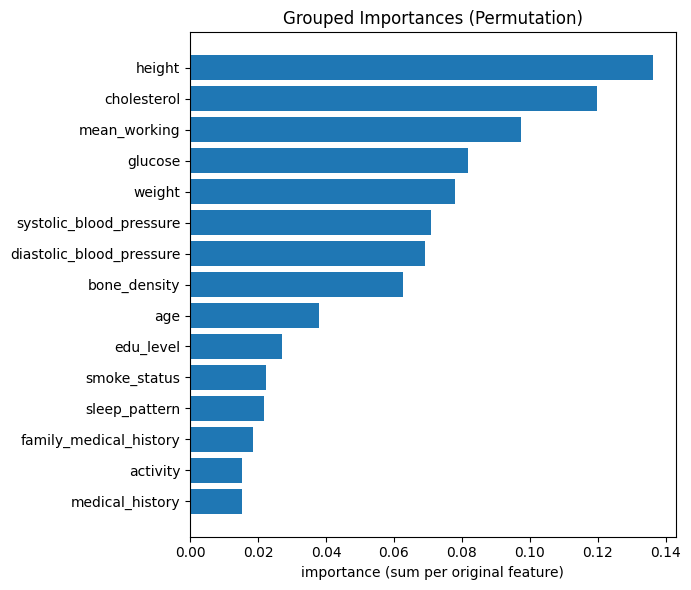

In [35]:
#7) 범주형은 원 변수 단위로 합산해서 랭킹 만들기
def aggregate_ohe_importance(perm_df, numeric_cols, categorical_cols):
    rows = []
    # 수치형은 그대로
    for col in numeric_cols:
        rows.append((col, perm_df.loc[perm_df["feature"] == col, "importance_mean"].sum()))
    # 범주형은 접두사 합산
    for cat in categorical_cols:
        m = perm_df["feature"].str.startswith(cat + "_")
        rows.append((cat, perm_df.loc[m, "importance_mean"].sum()))
    out = pd.DataFrame(rows, columns=["feature_group","importance_mean"]) \
          .sort_values("importance_mean", ascending=False)
    return out

group_imp = aggregate_ohe_importance(perm_imp, numeric_cols, categorical_cols)
print("\n[Grouped Importance (Permutation)]")
display(group_imp.head(15))

plt.figure(figsize=(7,6))
plt.barh(group_imp["feature_group"].head(15)[::-1], group_imp["importance_mean"].head(15)[::-1])
plt.title("Grouped Importances (Permutation)")
plt.xlabel("importance (sum per original feature)")
plt.tight_layout(); plt.show()
